<a href="https://colab.research.google.com/github/Sriraj-Penjerla/Sriraj-GlucoSense-Infy-Nov24/blob/main/Glucosense_Infy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data

In [38]:
data=pd.read_csv('diabetes_data.csv')
data.head(5)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,16,Male,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,25,Female,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
2,25,Male,1,1,0,0,1,1,1,1,0,1,0,0,1,0,1
3,26,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

# Removing duplicates

In [40]:
data.drop_duplicates(inplace=True)

In [41]:
data.shape

(251, 17)

# EDA

<Axes: title={'center': 'age'}, ylabel='Frequency'>

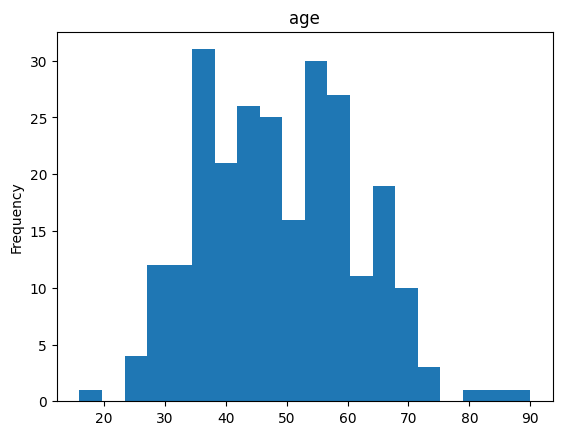

In [42]:
data['age'].plot(kind='hist', bins=20, title='age')



*   The ages in the histogram are mostly clustered around a central value.
*   The peak of the distribution appears to be around the 50-60 age range. This suggests that the majority of individuals in the dataset are in their mid-50s.
- The distribution is relatively wide, with ages ranging from approximately 15 to 85. This indicates a fair amount of variability in the ages of the individuals.
- More people who are having diabetes are around 55 .


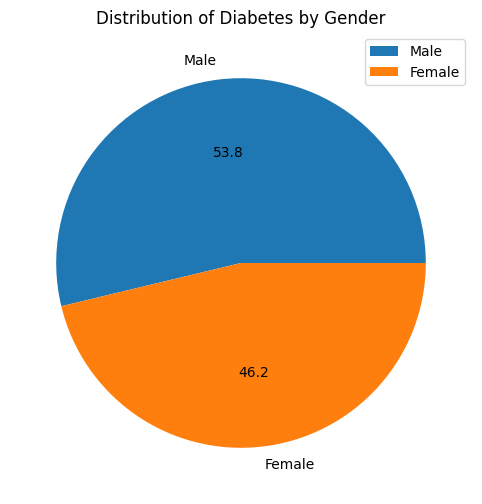

In [43]:
gender_diabetes_counts = data[data['class'] == 1]['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_diabetes_counts, labels=["Male","Female"], autopct='%1.1f')
plt.title('Distribution of Diabetes by Gender')
plt.legend()
plt.show()

 - A significantly larger proportion of individuals diagnosed with diabetes are male. The chart indicates that approximately 54.1% of the diabetes cases are among males.

 - Females account for the remaining 45.9% of diabetes cases.

 - There may be underlying biological factors that make males more susceptible to developing diabetes.

 - Differences in lifestyle factors, such as diet, exercise habits, and stress levels, between genders could contribute to the disparity.

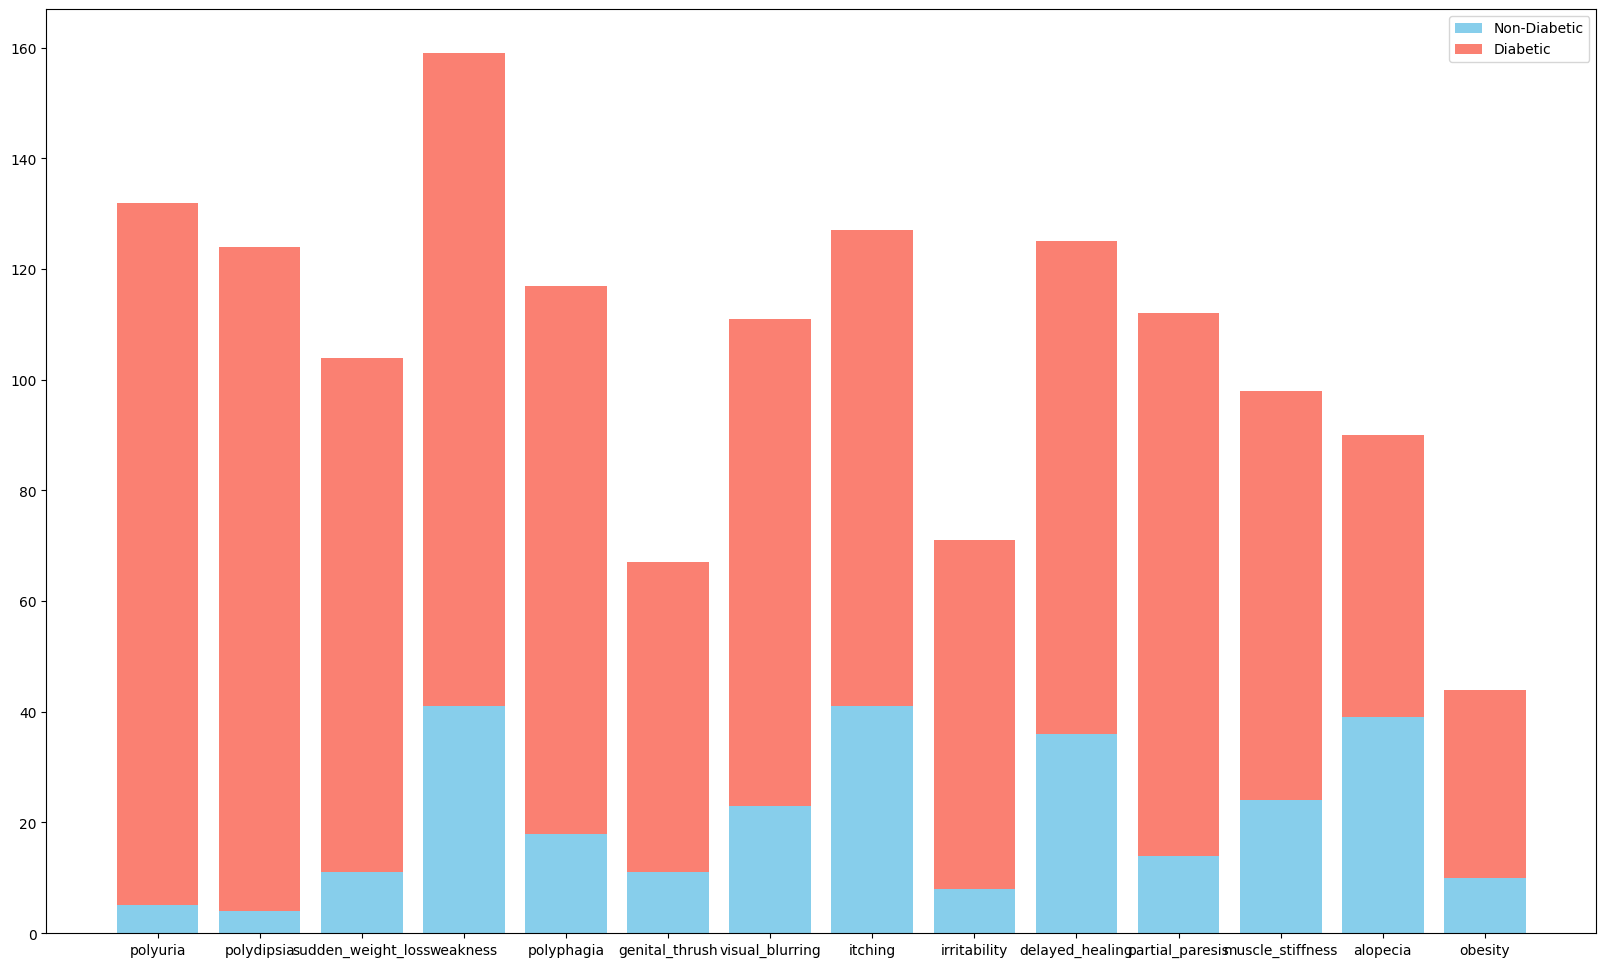

In [44]:
df=data
symptoms = df.columns[2:-1]
count_0=df[df['class'] == 0][symptoms].sum()
count_1=df[df['class'] == 1][symptoms].sum()
plt.figure(figsize=(20, 12))
plt.bar(symptoms, count_0, label='Non-Diabetic', color='skyblue')
plt.bar(symptoms, count_1, bottom=count_0, label='Diabetic', color='salmon')
plt.legend()

### **The chart visually compares the frequency of various symptoms in diabetic and non-diabetic patients. It's evident that many of these symptoms are more prevalent in diabetic patients.**

- **Polyuria and Polydipsia**: Both symptoms are significantly higher in diabetic patients. This is consistent with the understanding of diabetes as a condition characterized by excessive urination and thirst.

- **Sudden Weight Loss and Weakness**: These symptoms are also more prominent in diabetic patients, suggesting a potential link to the metabolic disturbances associated with the disease.

- **Polyphagia and Itching**: These symptoms show a moderate increase in diabetic patients compared to non-diabetic ones. This could be related to the body's attempt to compensate for increased glucose levels or other metabolic imbalances.
- **Partial Paresis and Muscle Stiffness**: These symptoms are more prevalent in diabetic patients, potentially indicating neurological complications associated with diabetes.
- **Alopecia and Obesity**: While these symptoms show some difference between the two groups, the difference is less pronounced compared to other symptoms.

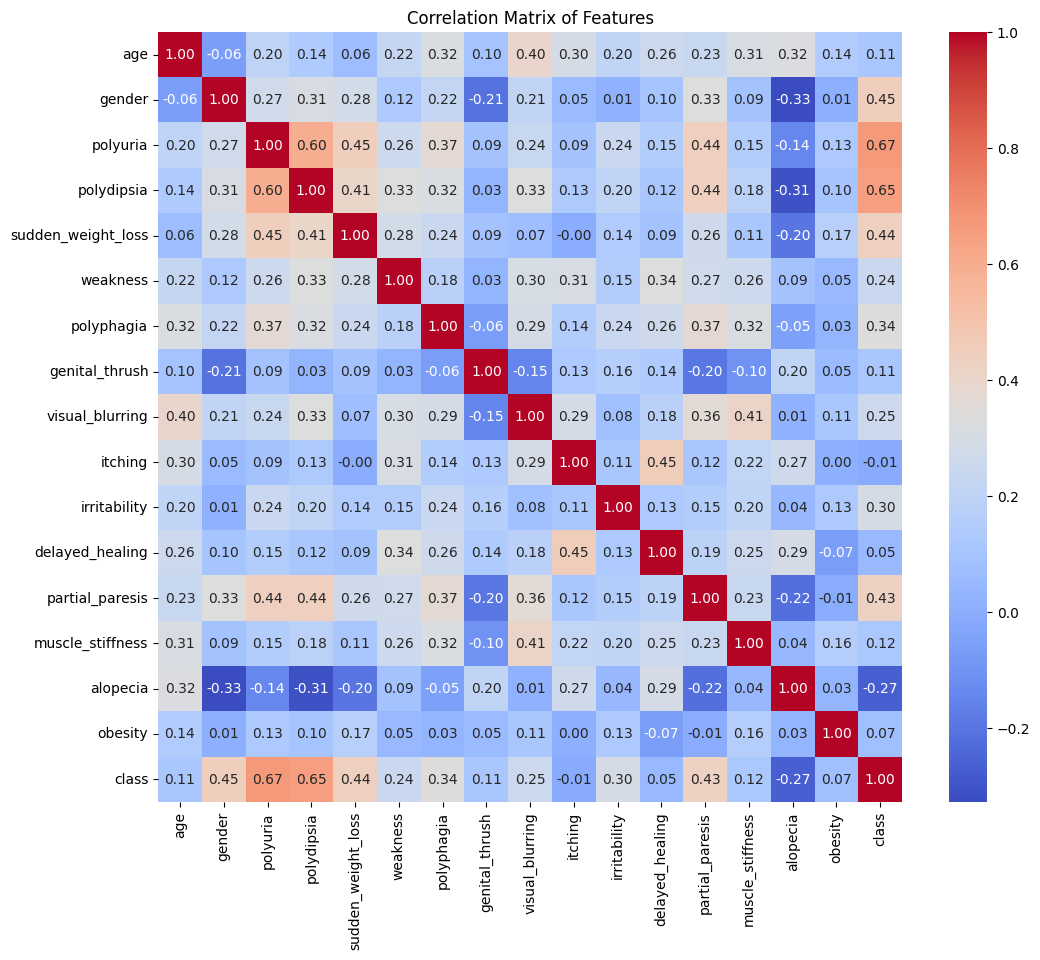

In [45]:
data=pd.read_csv('diabetes_data.csv')
import seaborn as sns
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### **Insights from the Correlation Matrix**

**Strong Correlations with Diabetes**:
- Polyuria
- polydipsia
- sudden weight loss
- weakness
- polyphagia

**Moderate Correlations:**
- Genital thrush
- visual blurring
- itching
- irritability
- delayed healing

**Weak Correlations:**
- Alopecia
- obesity

Overall, the correlation matrix provides valuable insights into the relationships between various symptoms and diabetes.

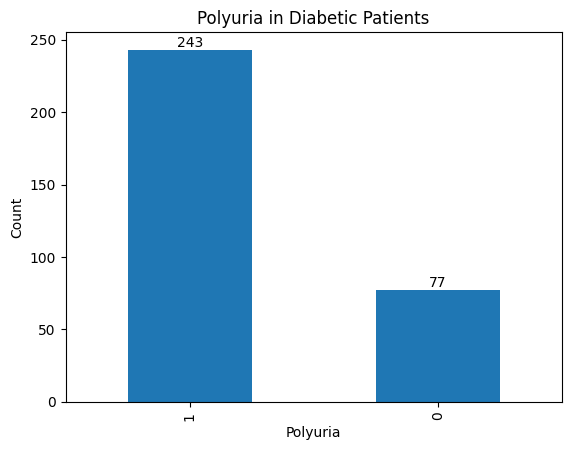

In [46]:
polyuria_diabetes = data[data['class'] == 1]['polyuria'].value_counts()
polyuria_diabetes.plot(kind='bar', title='Polyuria in Diabetic Patients')
plt.xlabel('Polyuria')
plt.ylabel('Count')

for i, v in enumerate(polyuria_diabetes):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

- The graph indicates a clear association between diabetes and polyuria.
A significant portion of diabetic patients (243 out of 320) exhibit polyuria.
- This suggests that polyuria is a common symptom of diabetes in this dataset.
- The majority of diabetic patients in this dataset experience polyuria.
- Only a smaller proportion (77 out of 320) do not have polyuria.

In [47]:
db_data = data[data['class'] == 1 ] # only diabetic data
db_data.shape

(320, 17)

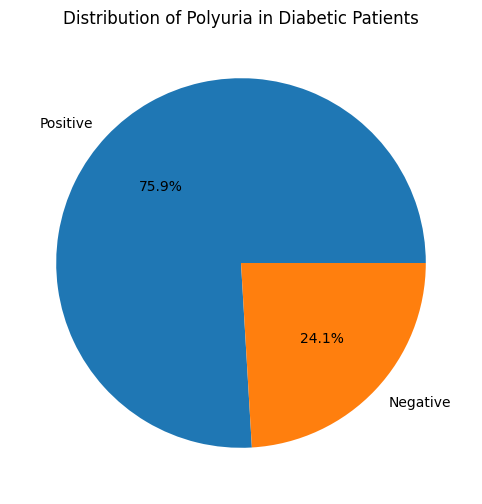

In [48]:
polyuria_diabetes = db_data[db_data['class'] == 1]['polyuria'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(polyuria_diabetes, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of Polyuria in Diabetic Patients')
plt.show()

- 75.9% of diabetic patients exhibit polyuria, indicating a strong association between the two.
- Polyuria is a common symptom of diabetes and can be a valuable diagnostic indicator.
- Further research is needed to explore the underlying mechanisms and clinical implications of this association.

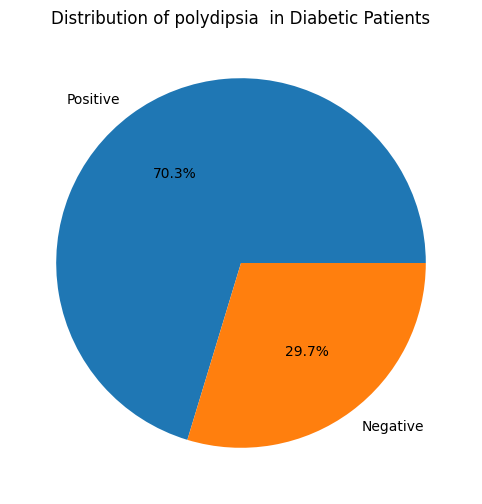

In [49]:
poly = db_data[db_data['class'] == 1]['polydipsia'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(poly, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of polydipsia  in Diabetic Patients')
# plt.legend()
plt.show()

- A significant number of diabetic patients, around 70.3%, experience excessive thirst or polydipsia.
- This suggests a strong link between diabetes and increased thirst.
- Polydipsia can be a key symptom in diagnosing diabetes early on.
- research is necessary to better understand why diabetes causes excessive thirst and how this knowledge can be used to improve patient care.

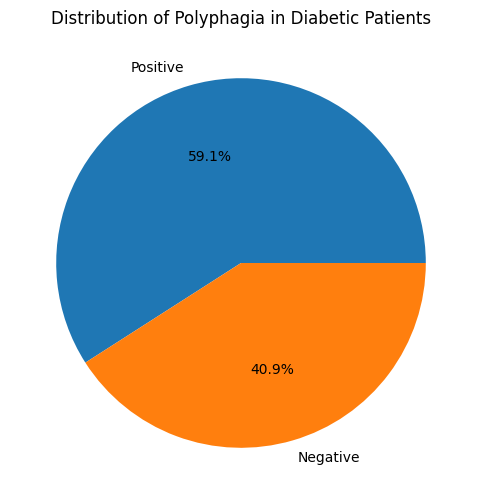

In [50]:
polyphagia = db_data[db_data['class'] == 1]['polyphagia'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(polyphagia, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of Polyphagia in Diabetic Patients')
plt.show()

- Nearly 60% of diabetic patients experience increased appetite or polyphagia.
- This suggests a strong link between diabetes and excessive hunger.
- Polyphagia can be a valuable clue in diagnosing diabetes early on.

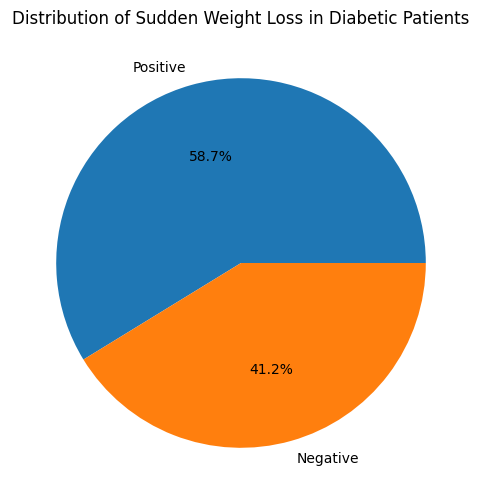

In [51]:
sudden_weight_loss = db_data[db_data['class'] == 1]['sudden_weight_loss'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sudden_weight_loss, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of Sudden Weight Loss in Diabetic Patients')
plt.show()

- Over half (58.7%) of diabetic patients experience sudden weight loss.
- This suggests a strong link between diabetes and unexplained weight loss.
- Sudden weight loss can be a warning sign of diabetes, especially when accompanied by other symptoms.

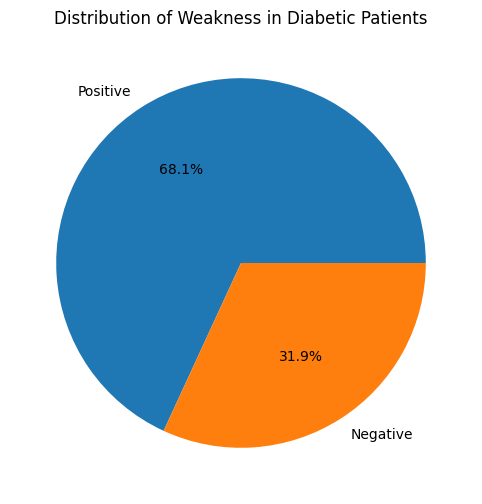

In [52]:
weakness = data[data['class'] == 1]['weakness'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(weakness, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of Weakness in Diabetic Patients')
plt.show()

- Around 68.1% of diabetic patients experience weakness.
- This suggests a strong link between diabetes and feelings of weakness.
- Weakness can be a symptom of diabetes, especially in cases of poor blood sugar control.